# Libraries

In [1]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display

# Dataset

* https://www.kaggle.com/datasets/cristiangarcia/pointcloudmnist2d/data

In [2]:
train_ds = pd.read_csv(
    os.path.join(os.getcwd(), 'datasets', '2d_mnist', 'train.csv')
)

test_ds = pd.read_csv(
    os.path.join(os.getcwd(), 'datasets', '2d_mnist', 'test.csv')
)

NUM_POINTS = 350

print(train_ds.shape, test_ds.shape)

(60000, 1054) (10000, 1054)


In [3]:
display(train_ds.head())
display(test_ds.head())

,label,x0,y0,v0,x1,y1,v1,x2,y2,v2,...,v347,x348,y348,v348,x349,y349,v349,x350,y350,v350
0,5,17,10,249,16,6,81,13,14,241,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,0,22,17,50,8,8,225,22,15,195,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,4,8,12,207,10,11,98,19,20,2,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,1,8,6,48,11,8,251,14,13,251,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,9,17,15,253,16,4,56,9,14,176,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


,label,x0,y0,v0,x1,y1,v1,x2,y2,v2,...,v347,x348,y348,v348,x349,y349,v349,x350,y350,v350
0,7,14,7,254,21,18,140,21,17,106,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,2,17,6,253,16,19,253,10,7,253,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,1,16,18,223,10,4,5,15,13,165,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,0,17,8,253,20,17,105,14,20,251,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,4,18,17,18,10,11,85,17,4,236,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [4]:
display(train_ds.info())
display(test_ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 1054 entries, label to v350
dtypes: int64(1054)
memory usage: 482.5 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 1054 entries, label to v350
dtypes: int64(1054)
memory usage: 80.4 MB


None

In [5]:
def plot_number(number, label = ""):
    c = None
    title = f"Number {label}"
    plt.title(title)

    data = number
    if number.size == 351*3 and number.shape != (351, 3):
        data = number.reshape(351, 3)
        c = data[:, 2]

    elif number.size == 351*2 and number.shape != (351, 2):
        data = number.reshape(351, 2)

    x = data[:, 0]
    y = data[:, 1]
    
    plt.scatter(x, y, c=c, cmap='magma')
    plt.show()

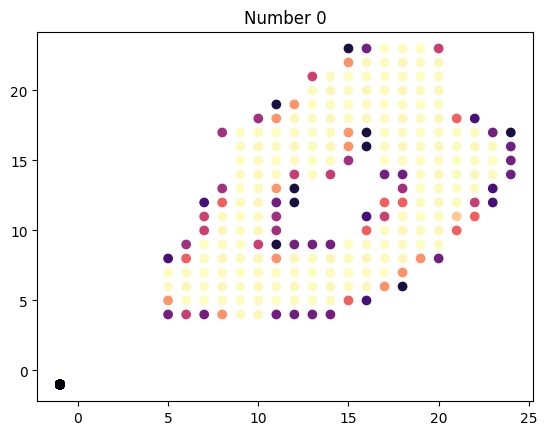

In [6]:
index = np.random.randint(0, train_ds.shape[0])
number = train_ds.iloc[index]

plot_number(number.drop(['label']).values, number['label'])


# Reshaping dataset

* Original Shape (60000, 1054) -> All points mixed like x1, x2, y1, y2, v1, v2....
    * x and y are cartesian points and v are the pixel range.
* New Shape (60000, 351, 3)
    * The idea is to have (sample, points, (x, y, v))

In [7]:
def reshape_dataset_and_split(dataset):
    return dataset.drop(['label'], axis=1).values.reshape(-1, 351, 3), dataset['label'].values

/tmp/ipykernel_76896/2753858645.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y, c=c, cmap='magma')


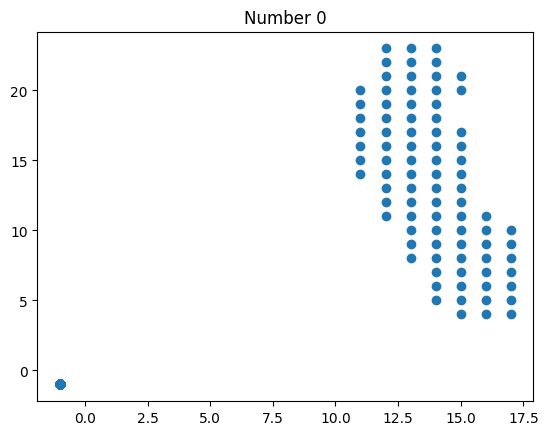

In [18]:
X_train, y_train = reshape_dataset_and_split(train_ds)
X_test, y_test = reshape_dataset_and_split(test_ds)

# The information about the color is not important
# X_train = X_train[:, :, 0:2]
# X_test = X_test[:, :, 0:2]

index = np.random.randint(0, X_train.shape[0])
plot_number(X_train[index], np.argmax(y_train[index]))

In [19]:
np.min(X_test[:, :, 0]), np.max(X_test[:, :, 0]), np.min(X_test[:, :, 1]), np.max(X_test[:, :, 1])

(-1, 27, -1, 26)

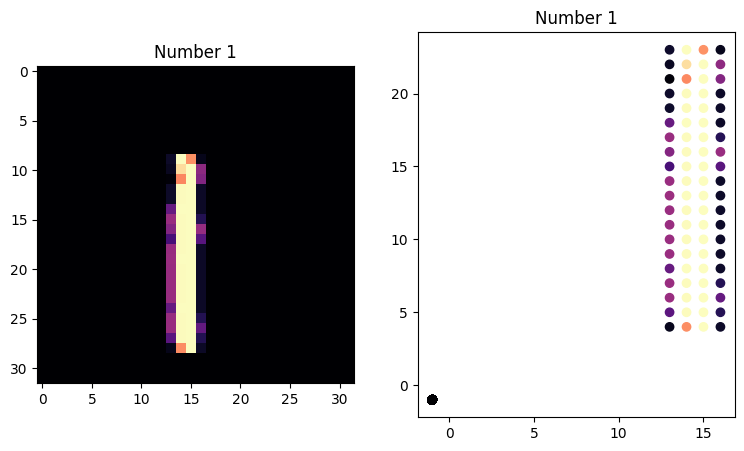

In [21]:
# Testing the ideia
index = np.random.randint(0, X_test.shape[0])

teste = X_test[index]
label = y_test[index]

def convert_point_cloud_to_image(point_cloud):
    image = np.zeros((32, 32, 1), dtype=np.float16)
    
    for row in point_cloud:
        x_index = row[0]
        y_index = row[1]
        color = row[2]
        
        if x_index >= 0 and y_index >=0:
            # I had to inver axis to keep x[0] and y[0] together as we can see in the plot 
            image[-y_index, x_index] = color
    
    image = image / 255
    
    return image
             

image = convert_point_cloud_to_image(teste)


fig, (ax1, ax2) = plt.subplots(figsize=(9, 5), nrows=1, ncols=2)

ax1.set_title(f"Number {label}")
ax1.imshow(image, cmap='magma')

ax2.set_title(f"Number {label}")
ax2.scatter(teste[:, 0], teste[:, 1], c=teste[:, 2], cmap="magma");

In [22]:
X_train_converted = np.asarray(list(map(convert_point_cloud_to_image, X_train)))
X_train_converted.shape

(60000, 32, 32, 1)

In [23]:
X_test_converted = np.asarray(list(map(convert_point_cloud_to_image, X_test)))
X_test_converted.shape

(10000, 32, 32, 1)

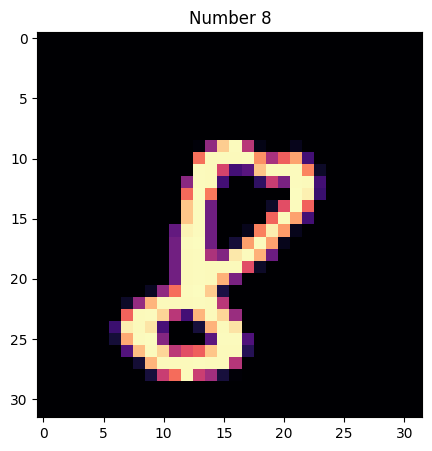

In [30]:
index = np.random.randint(0, X_test.shape[0])

image = X_test_converted[index]
label = y_test[index]

plt.figure(figsize=(6, 5))
plt.title(f"Number {label}")
plt.imshow(image, cmap='magma')
plt.show()

# CNN Model

In [32]:
from keras.api.models import Sequential
from keras.api.layers import RandomRotation, RandomZoom, Input, Conv1D, Conv2D, MaxPool1D, \
    MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling1D, GlobalAveragePooling2D
from keras.api.optimizers import Adam

# Model for image
def create_model_img():
    model = Sequential([
        Input(shape=(32, 32, 1)),
        BatchNormalization(),

        # Data agumentation - just small rotation and zoom can help the model to generalze.
        # Be carefull about the rotation because the model can make a mistake by guessing 9 when was 6...
        # RandomRotation(0.1),
        # RandomZoom(0.1),

        # Convolution 1
        Conv2D(32, kernel_size=3, activation='relu', padding='same'),
        MaxPool2D(pool_size=2, padding='same'),

        # Convolution 2
        Conv2D(64, kernel_size=3, activation='relu', padding='same'),
        MaxPool2D(pool_size=2),

        # Convolution 3
        Conv2D(128, kernel_size=3, activation='relu', padding='same'),
        MaxPool2D(pool_size=2),
        
        # Head
        # Flatten(),
        GlobalAveragePooling2D(),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001, epsilon=0.01),
        loss='categorical_crossentropy',
        metrics=['categorical_accuracy']
    )

    return model

# Model for point cloud
def create_model_pc():
    model = Sequential([
        Input(shape=(351, 2)),
        BatchNormalization(),

        # Convolution 1
        Conv1D(32, kernel_size=3, activation='relu', padding='same'),
        MaxPool1D(pool_size=2, padding='same'),

        # Convolution 2
        Conv1D(64, kernel_size=3, activation='relu', padding='same'),
        MaxPool1D(pool_size=2),

        # Head
        GlobalAveragePooling1D(),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001, epsilon=0.001),
        loss='categorical_crossentropy',
        metrics=['categorical_accuracy']
    )

    return model

## Image Model

In [34]:
model_img = create_model_img()
model_img.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_3           │ (None, 32, 32, 1)      │             4 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 129,294 (505.05 KB)

 Trainable params: 128,780 (503.05 KB)

 Non-trainable params: 514 (2.01 KB)

In [35]:
from keras.api.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=0.01,
    restore_best_weights=True
)

y_train_dummy = pd.get_dummies(y_train).values.astype('uint8')
y_test_dummy = pd.get_dummies(y_test).values.astype('uint8')

history = model_img.fit(
    x=X_train_converted,
    y=y_train_dummy,
    epochs=50,
    batch_size=300,
    validation_data=(X_test_converted, y_test_dummy),
) # 0.9

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - categorical_accuracy: 0.5964 - loss: 1.2799 - val_categorical_accuracy: 0.6972 - val_loss: 1.7700
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - categorical_accuracy: 0.9551 - loss: 0.1783 - val_categorical_accuracy: 0.9402 - val_loss: 0.5552
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - categorical_accuracy: 0.9716 - loss: 0.1042 - val_categorical_accuracy: 0.9248 - val_loss: 0.2340
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - categorical_accuracy: 0.9793 - loss: 0.0736 - val_categorical_accuracy: 0.9167 - val_loss: 0.2512
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - categorical_accuracy: 0.9841 - loss: 0.0588 - val_categorical_accuracy: 0.9495 - val_loss: 0.1536
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - categorical_accuracy: 0.9862 - loss: 0.0466 - val_categorical_accuracy: 0.9432 - val_loss: 0.1838
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - categorical_accuracy: 0.98

<Axes: >

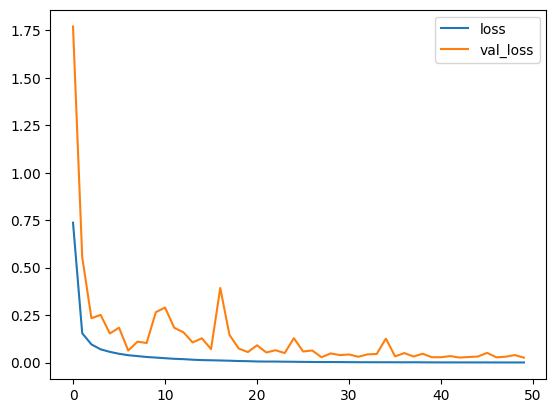

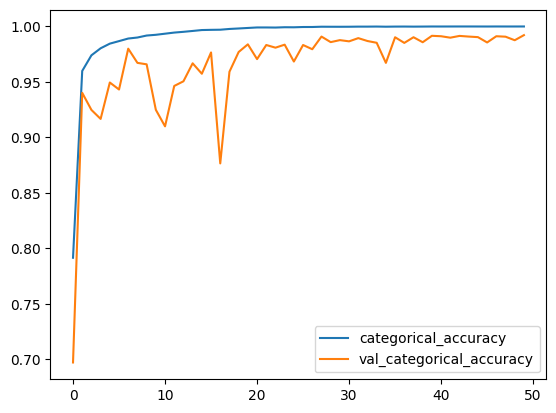

In [36]:
img_learning = pd.DataFrame(history.history)

img_learning[['loss', 'val_loss']].plot()
img_learning[['categorical_accuracy', 'val_categorical_accuracy']].plot()

## Point Cloud Model

In [37]:
model_pc = create_model_pc()
model_pc.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_5           │ (None, 351, 2)         │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 351, 32)        │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 176, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 176, 64)        │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 88, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,674 (104.20 KB)

 Trainable params: 26,158 (102.18 KB)

 Non-trainable params: 516 (2.02 KB)

In [38]:
from keras.api.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=0.01,
    restore_best_weights=True
)

y_train_dummy = pd.get_dummies(y_train).values
y_test_dummy = pd.get_dummies(y_test).values

X_train_no_color = X_train[:, :, 0:2]
X_test_no_color = X_test[:, :, 0:2]

history = model_pc.fit(
    x=X_train_no_color,
    y=y_train_dummy.astype('uint8'),
    epochs=100,
    batch_size=300,
    validation_data=(X_test_no_color, y_test_dummy),
)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - categorical_accuracy: 0.3232 - loss: 1.8650 - val_categorical_accuracy: 0.1032 - val_loss: 2.5412
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - categorical_accuracy: 0.6162 - loss: 1.1536 - val_categorical_accuracy: 0.2945 - val_loss: 1.8094
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - categorical_accuracy: 0.6859 - loss: 0.9275 - val_categorical_accuracy: 0.5189 - val_loss: 1.3585
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - categorical_accuracy: 0.7328 - loss: 0.7925 - val_categorical_accuracy: 0.6645 - val_loss: 0.9575
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - categorical_accuracy: 0.7683 - loss: 0.6929 - val_categorical_accuracy: 0.6930 - val_loss: 0.9165
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - categorical_accuracy: 0.7923 - loss: 0.6272 - val_categorical_accuracy: 0.6665 - val_loss: 1.0587
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - categorical_accuracy

<Axes: >

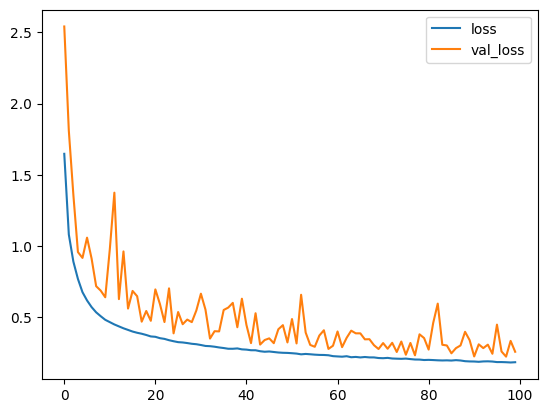

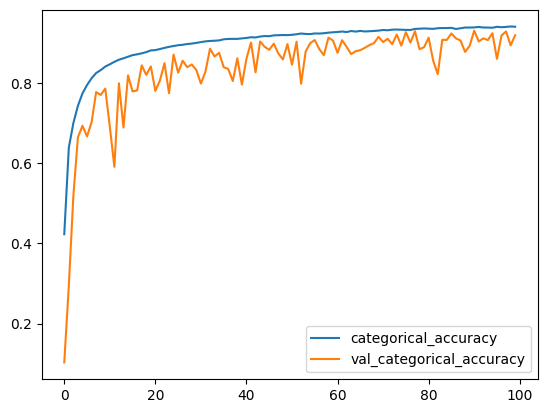

In [39]:
pc_learning = pd.DataFrame(history.history)

pc_learning[['loss', 'val_loss']].plot()
pc_learning[['categorical_accuracy', 'val_categorical_accuracy']].plot()

# Comparing the models

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
from seaborn import heatmap

img_predictions = model_img.predict(X_test_converted)
pc_predictions = model_pc.predict(X_test_no_color)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [41]:
report_img = classification_report(
    np.argmax(y_test_dummy, axis=1),
    np.argmax(img_predictions, axis=1)
)
report_pc = classification_report(
    np.argmax(y_test_dummy, axis=1),
    np.argmax(pc_predictions, axis=1)
)

print("Evaluation of the image model")
print(report_img)

print("\nEvaluation of the point cloud model")
print(report_pc)

Evaluation of the image model
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000


Evaluation of the point cloud model
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       980
           1       0.96      0.99      0.97      1135
           

The model which deal with the clound points with (x, y, color) (32, 32, 1) values is easier to train and also the results are better than the model which deal with (point, coordinate) (351, 2).

Evaluation of the image model
           
           label  precision  recall  f1-score   support
           0       1.00      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
    macro avg      0.99      0.99      0.99     10000
    weighted avg   0.99      0.99      0.99     10000



Evaluation of the point cloud model
            
           label  precision  recall  f1-score   support
           0       0.98      0.96      0.97       980
           1       0.96      0.99      0.97      1135
           2       0.87      0.97      0.92      1032
           3       0.89      0.90      0.89      1010
           4       0.98      0.84      0.91       982
           5       0.96      0.84      0.90       892
           6       0.97      0.96      0.96       958
           7       0.94      0.90      0.92      1028
           8       0.88      0.88      0.88       974
           9       0.81      0.94      0.87      1009

    accuracy                           0.92     10000
    macro avg      0.92      0.92      0.92     10000   
    weighted avg   0.92      0.92      0.92     10000


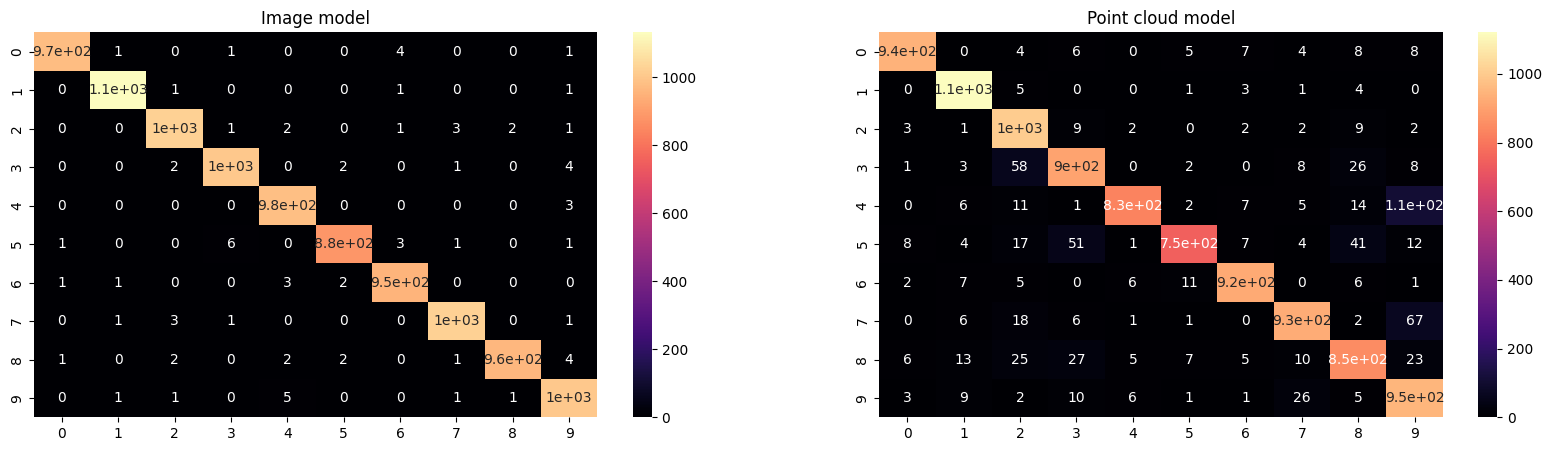

In [47]:
cm_img = confusion_matrix(
    np.argmax(y_test_dummy, axis=1),
    np.argmax(img_predictions, axis=1)
)
cm_pc = confusion_matrix(
    np.argmax(y_test_dummy, axis=1),
    np.argmax(pc_predictions, axis=1)
)

plt.figure(figsize=(20, 5))

plt.subplot(121)
plt.title("Image model")
heatmap(cm_img, annot=True, cmap="magma");

plt.subplot(122)
plt.title("Point cloud model")
heatmap(cm_pc, annot=True, cmap="magma");

# Saving the model

In [48]:
# model_img.save('point_cloud_2d_mnist_img.keras')
# model_pc.save('point_cloud_2d_mnist_pc.keras')